## ML Final Project

**Scenario:** You work at a multinational bank that is aiming to increase it's market share in 
Europe. Recently, it has been noticed that the number of customers using the banking 
services has declined, and the bank is worried that existing customers have stopped 
using them as their main bank. <br> 

As a data scientist, you are tasked with finding out the 
reasons behind customer churn (when a customer stops using them as the main bank) and to predict customer churn. <br> 

The marketing team, 
in particular, is interested in your findings and want to better understand existing 
customer behavior and possibly predict customer churn. Your results will help the 
marketing team to use their budget wisely to target potential churners. To achieve 
this objective, in this exercise, you will import the banking data (Churn_Modelling.csv) 
provided by the bank and do some machine learning to solve their problem.

Data dictionary

- CustomerID: Unique ID of each customer
- CredRate: Credit Score of the customer 
- Geography: Country customer is from 
- Gender
- Age
- Tenure: How long customer has been with bank
- Balance: amount of money customer has/had with the bank
- Prod Number: Number of products customer has with bank 
- HasCrCard: Does customer have credit card
- ActMem: wheather customer was actively engaged with the bank activities (1 is yes)
- Estimated salary: Annual estimated salary of customer 
- Exited: Whether customer has churned (1 is yes)

## Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
import plotly.offline as offline

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

## Import data**

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

CustomerId  CredRate Geography  Gender   Age  Tenure    Balance  \
0    15634602       619    France  Female  42.0       2       0.00   
1    15647311       608     Spain  Female  41.0       1   83807.86   
2    15619304       502    France  Female  42.0       8  159660.80   
3    15701354       699    France  Female  39.0       1       0.00   
4    15737888       850     Spain  Female  43.0       2  125510.82   

   Prod Number  HasCrCard  ActMem  EstimatedSalary  Exited  
0            1          1       1        101348.88       1  
1            1          0       1        112542.58       0  
2            3          1       0        113931.57       1  
3            2          0       0         93826.63       0  
4            1          1       1         79084.10       0

In [3]:
# to ensure column name is readable by python, rename column's name with space by _.

df.rename({'Prod Number' : 'Prod_Number'}, axis='columns', inplace=True)
df.head(3).append(df.tail(3))

CustomerId  CredRate Geography  Gender   Age  Tenure    Balance  \
0       15634602       619    France  Female  42.0       2       0.00   
1       15647311       608     Spain  Female  41.0       1   83807.86   
2       15619304       502    France  Female  42.0       8  159660.80   
9997    15584532       709    France  Female  36.0       7       0.00   
9998    15682355       772   Germany    Male  42.0       3   75075.31   
9999    15628319       792    France  Female  28.0       4  130142.79   

      Prod_Number  HasCrCard  ActMem  EstimatedSalary  Exited  
0               1          1       1        101348.88       1  
1               1          0       1        112542.58       0  
2               3          1       0        113931.57       1  
9997            1          0       1         42085.58       1  
9998            2          1       0         92888.52       1  
9999            1          1       0         38190.78       0

## Handling missing values**

In [4]:
df.isna().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod_Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [5]:
# Dropping data rows with missing values for 'Gender' column

df.dropna(how='any', subset=['Gender'], inplace=True)

Null values before treatment: 6


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



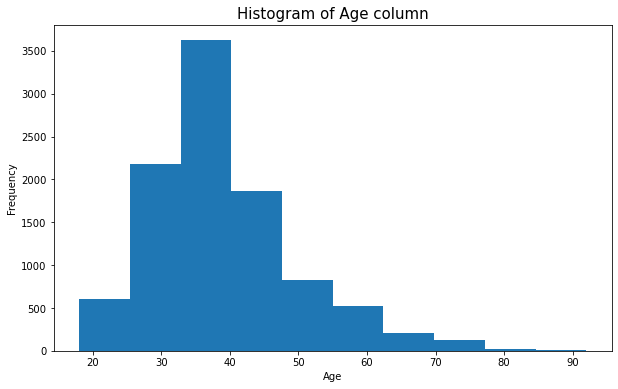

In [6]:
# check the number of nan values in the column 'Age'

print("Null values before treatment:", df['Age'].isna().sum())

# plot histogram

plt.figure(figsize = (10,6))
plt.hist(x = df['Age'])
plt.title('Histogram of Age column', fontsize = 15)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

👀 Since values in the column 'Age' are relatively balanced, we can use the mean value of the column to impute the missing observations.

In [7]:
# Imputing column 'Age' with mean value 

df['Age'] = df['Age'].fillna(df['Age'].mean())

# display the result

print("null values after treatment:",df['Age'].isna().sum())

null values after treatment: 0


Null values before treatment: 4


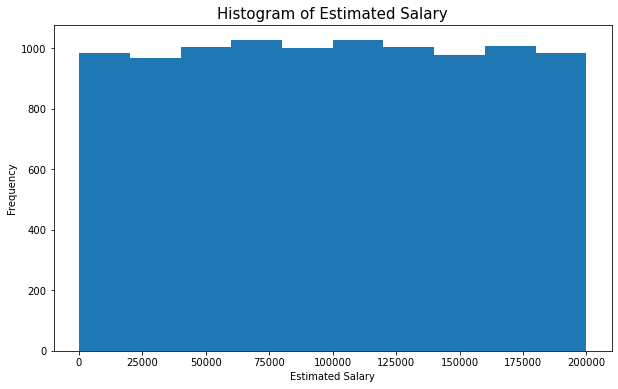

In [8]:
# check the number of nan values in the column 'EstimatedSalary'

print("Null values before treatment:", df['EstimatedSalary'].isnull().sum())

# plot histogram

plt.figure(figsize = (10,6))
plt.hist(x = df['EstimatedSalary'])
plt.title('Histogram of Estimated Salary', fontsize = 15)
plt.xlabel('Estimated Salary', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.show()

👀 Since values in the column 'EstimatedSalary' are relatively balanced, we can use the mean value of the column to impute the missing observations.

In [9]:
# Imputing column'EstimatedSalary' with mean value 

df['EstimatedSalary'] = df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

# display the result

print("null values after treatment:",df['EstimatedSalary'].isna().sum())

null values after treatment: 0


In [10]:
# Checking on the nan value again

df.isna().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod_Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

👀 now no more nan value.

## Data Exploration**

In [11]:
# Checking on data information and data type used

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9996 non-null   int64  
 1   CredRate         9996 non-null   int64  
 2   Geography        9996 non-null   object 
 3   Gender           9996 non-null   object 
 4   Age              9996 non-null   float64
 5   Tenure           9996 non-null   int64  
 6   Balance          9996 non-null   float64
 7   Prod_Number      9996 non-null   int64  
 8   HasCrCard        9996 non-null   int64  
 9   ActMem           9996 non-null   int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           9996 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1015.2+ KB


👀 Need to convert Geography and Gender columns from categorical value (object dtype) to numerical value.

**Handling duplicate value**

In [12]:
# checking any duplicate value in data

df.duplicated().value_counts()

False    9996
dtype: int64

👀 No duplicated values found.

0    7960
1    2036
Name: Exited, dtype: int64


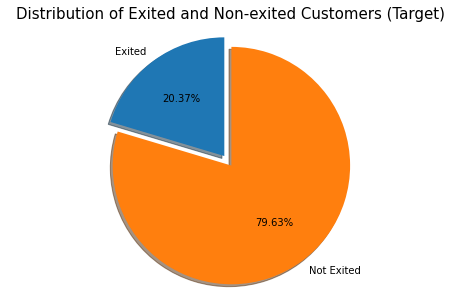

In [13]:
# Checking on the Exited column (Target) distribution ratio.

counts_target = df.Exited.value_counts()
print (counts_target)

labels = 'Exited', 'Not Exited'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Distribution of Exited and Non-exited Customers (Target)", size = 15)
plt.show()

👀 Values distribution in the target column are relatively imbalanced.

In [14]:
df.describe()

CustomerId     CredRate          Age       Tenure        Balance  \
count  9.996000e+03  9996.000000  9996.000000  9996.000000    9996.000000   
mean   1.569094e+07   650.532813    38.925626     5.013005   76487.967083   
std    7.192807e+04    96.648162    10.486494     2.892095   62393.487575   
min    1.556570e+07   350.000000    18.000000     0.000000       0.000000   
25%    1.562853e+07   584.000000    32.000000     3.000000       0.000000   
50%    1.569074e+07   652.000000    37.000000     5.000000   97198.540000   
75%    1.575322e+07   718.000000    44.000000     7.000000  127639.372500   
max    1.581569e+07   850.000000    92.000000    10.000000  250898.090000   

       Prod_Number    HasCrCard       ActMem  EstimatedSalary       Exited  
count  9996.000000  9996.000000  9996.000000      9996.000000  9996.000000  
mean      1.530312     0.705482     0.515106    100074.498091     0.203681  
std       0.581679     0.455849     0.499797     57497.117948     0.402755  
min       1.000000     0.000000     0.000000        11.580000     0.000000  
25%       1.000000     0.000000     0.000000     51002.110000     0.000000  
50%       1.000000     1.000000     1.000000    100134.325000     0.000000  
75%       2.000000     1.000000     1.000000    149382.097500     0.000000  
max       4.000000     1.000000     1.000000    199992.480000     1.000000

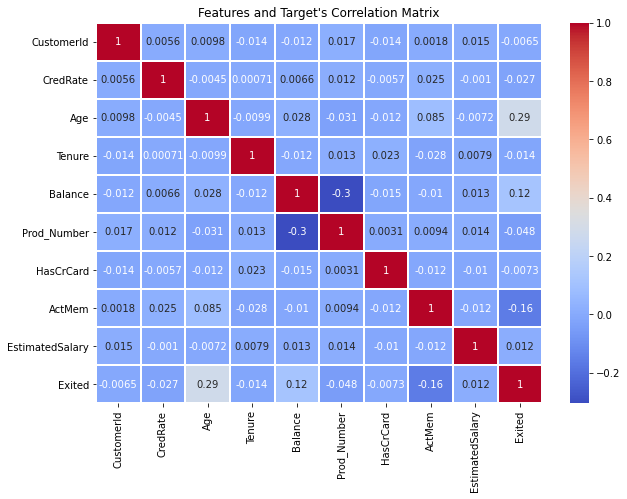

In [15]:
# Visualize the correlations between features (X) and the target (y), Exited

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='coolwarm',linecolor='white',linewidths=1, annot=True)
plt.title("Features and Target's Correlation Matrix");
plt.savefig('corre.png', bbox_inches='tight')

👀 The above results show that there are very minimum correlations between the variables in the data set.  The closest correlation amongst the variables are Prod_Number and Balance, which make sense that higher savings' group of customer might have better capacity to engaged with more products or services offered by the bank.

On the other hand, CustomerId and HasrCrCard shows lowest correlationship with the target (Exited). CustomerId will consider as uninformative feature in this case. But for HasCrCard, it depend on the nature of data provided wether it depicts only the customer has credit card within the bank or can be with other bank also.  In this case, the second screnario is lightly to be higher.

In [16]:
# split the exited and non-exited group

exited_1 = df.loc[(df.Exited == 1)]
exited_0 = df.loc[(df.Exited == 0)]

In [17]:
# define a function to plot a histogram for all numerical features to visualise number of customers exited and not exited

def histogram(column) :
    
    trace1 = go.Histogram(x = exited_1[column], name = 'Exited', histnorm = "percent")

    trace2 = go.Histogram(x = exited_0[column], name = 'Not Exited', histnorm = "percent")

    data = [trace1, trace2]

    layout = go.Layout(title=column + " Distribution",
                       xaxis=dict(title=column),
                       yaxis=dict(title="Percentages"))

    fig = go.Figure(data=data, layout=layout)

    fig.update_layout(title=column + " Distribution", title_x=0.45)

    offline.iplot(fig)

In [18]:
histogram('Age')

In [19]:
# calculate the percentage of range selected 

exited_Age = exited_1[['Age']].count()

selectedRange_Age = exited_1.loc[(exited_1['Age'] >= 37) & (exited_1['Age'] <= 52), 'Age'].count()

percentage_Age = selectedRange_Age/exited_Age * 100
percentage_Age

Age    59.086444
dtype: float64

👀 As Observed, number of customers who stay with the bank decreases as the ages are increasing. Especially in the range starting from ages 37 to 52 years old, the number of customers exited the bank is maintained at a higher level with an average of 3% and above as compared to the other ages. A Total of 59.08% out of the total exited customers are derived from the above mentioned range of age. It can be due to the reason of an increasing amount in demand for a more comprehensive product or services relative to the change in the different stages of life, however, other banks might be offering a better or more appropriate product or service to them instead. Hence, it causes an increasing amount of exited customers in this range.

In [20]:
histogram ('Balance')

In [21]:
# calculate the percentage of range selected 

exited_Balance = exited_1[['Balance']].count()

selectedRange_Balance = exited_1.loc[(exited_1['Balance'] >= 97500) & (exited_1['Balance'] <= 147500) , 'Balance'].count()

percentage_Balance = selectedRange_Balance/exited_Balance * 100
percentage_Balance

Balance    48.624754
dtype: float64

👀 As Observed, there are 2 groups of the customer in Balance that makeup of 73.12% in the total exited amount.  The very first group are customers who have zero savings with the bank, which shows 24.5% out of the total. The second group are customers who have savings with the bank ranging from 97.5k to 147.5k, which shows 48.62% out of the total. 

In [22]:
histogram ('CredRate')

In [23]:
# calculate the percentage of range selected 

exited_CredRate = exited_1[['CredRate']].count()

selectedRange_CredRate = exited_1.loc[(exited_1['CredRate'] >= 550) & (exited_1['CredRate'] <= 700) ,'CredRate'].count()

percentage_CredRate = selectedRange_CredRate/exited_CredRate * 100
percentage_CredRate

CredRate    51.866405
dtype: float64

👀 As Observed, more than half (51.86%) of the exited customers in CredRate are falling in the range of 550 to 700 credit score.  Other than the above-mentioned group of customers, those who have a credit score of less than 400 tend to also leave the bank.

In [24]:
histogram ('EstimatedSalary')

👀 As observed above, the illustration of the graph shows that the number of exited and non-exited customers are almost the same in all range of estimated salary.

In [25]:
histogram ('Tenure')

👀 As observed above, the illustration of the graph shows that the number of exited and non-exited customers are almost the same in all range of Tenure.

In [35]:
# define a function to plot a countplot graph to visualise number of customers exited and not exited in the feature

def count(column) :
    
    plt.figure (figsize=(10,5))
    splot = sns.countplot(x=column, hue='Exited', data=df, palette="viridis")
    plt.ylim(0,6000)
    plt.suptitle(column + " Count")
    for p in splot.patches:
        splot.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');

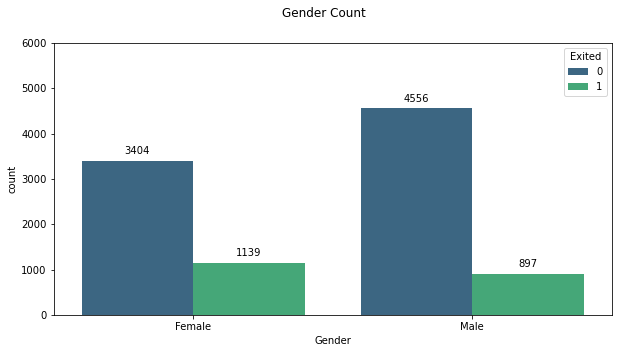

In [36]:
count ('Gender')

In [29]:
# count number of customers in Gender 

gender_counts = df.Gender.value_counts()
gender_counts

Male      5453
Female    4543
Name: Gender, dtype: int64

In [30]:
# count exited customers in Gender

exited_gender_counts = exited_1.Gender.value_counts()
exited_gender_counts

Female    1139
Male       897
Name: Gender, dtype: int64

In [31]:
# Calculate proportion for gender exited out of all exited customers

proportion_female = exited_gender_counts["Female"]/sum(exited_gender_counts)*100
proportion_male = exited_gender_counts["Male"]/sum(exited_gender_counts)*100
print("Female :" , proportion_female)
print("Male :" , proportion_male)

Female : 55.94302554027505
Male : 44.05697445972495


In [32]:
# Calculate proportion for individual gender exited out of its own group

proporation_femaleGroup = exited_gender_counts["Female"]/gender_counts["Female"]*100
proporation_maleGroup = exited_gender_counts["Male"]/gender_counts["Male"]*100
print("Female :" , proporation_femaleGroup)
print("Male :" , proporation_maleGroup)

Female : 25.071538630860662
Male : 16.449660737208877


👀  As observed, more female customers (55.94%) tend to leave the bank as compared to the number of male customers.  Based on the gender proportion, a total of 25.07% female customers exited the bank within the female group while only 16.45% male customers exited the bank within the male group.

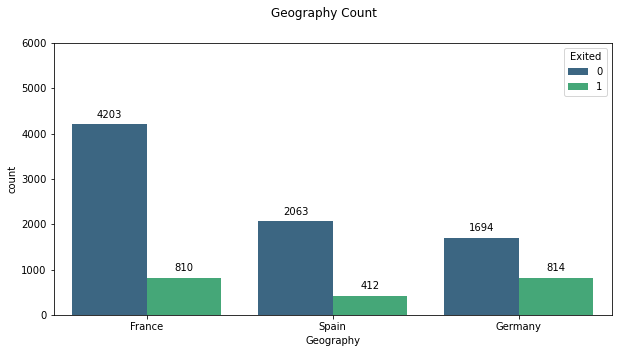

In [33]:
count ('Geography')

In [34]:
# count number of customers in Geography

geography_counts = df.Geography.value_counts()
geography_counts

France     5013
Germany    2508
Spain      2475
Name: Geography, dtype: int64

In [35]:
# count exited customers in Georgraphy

exited_geography_counts = exited_1.Geography.value_counts()
exited_geography_counts

Germany    814
France     810
Spain      412
Name: Geography, dtype: int64

In [36]:
# Calculate proportion for country exited out of all exited customers

proportion_germany = exited_geography_counts["Germany"]/sum(exited_geography_counts)*100
proportion_france = exited_geography_counts["France"]/sum(exited_geography_counts)*100
proportion_spain = exited_geography_counts["Spain"]/sum(exited_geography_counts)*100
print("Germany :", proportion_germany)
print("France:", proportion_france)
print("Spain :", proportion_spain)

Germany : 39.980353634577604
France: 39.783889980353635
Spain : 20.23575638506876


In [37]:
# Calculate proportion for individual country exited out of its own group

proportion_germanyGroup = exited_geography_counts["Germany"]/geography_counts["Germany"]*100
proportion_franceGroup = exited_geography_counts["France"]/geography_counts["France"]*100
proportion_spainGroup = exited_geography_counts["Spain"]/geography_counts["Spain"]*100
print("Germany :", proportion_germanyGroup)
print("France:", proportion_franceGroup)
print("Spain :", proportion_spainGroup)

Germany : 32.45614035087719
France: 16.15798922800718
Spain : 16.646464646464647


👀 As observed, more German customers (39.98%) tend to leave the bank as compared to other countries, followed by France (39.78%) and Spain (20.24%) respectively. But based on the individual country's proportion, Germany still maintained the highest exited rate at 32.46%. However, for France and Spain, Spain has actually got more customers who exited the bank (16.65%) as compared to France (16.16%) within its own country.

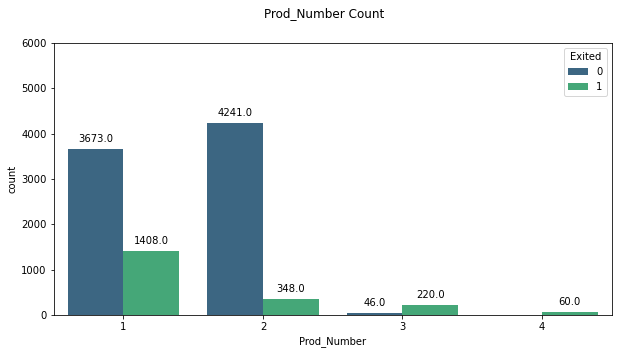

In [38]:
count ('Prod_Number')

In [39]:
# count number of customers in Prod_Number

PN_counts = df.Prod_Number.value_counts()
PN_counts

1    5081
2    4589
3     266
4      60
Name: Prod_Number, dtype: int64

In [40]:
# count exited customers in Prod_Number

exited_PN_counts = exited_1.Prod_Number.value_counts()
exited_PN_counts

1    1408
2     348
3     220
4      60
Name: Prod_Number, dtype: int64

In [41]:
# Calculate proportion for Prod_Number exited out of all exited customers

proportion_1 = exited_PN_counts[1]/sum(exited_PN_counts)*100
proportion_2 = exited_PN_counts[2]/sum(exited_PN_counts)*100
proportion_3 = exited_PN_counts[3]/sum(exited_PN_counts)*100
proportion_4 = exited_PN_counts[4]/sum(exited_PN_counts)*100
print("P1 :", proportion_1)
print("P2 :", proportion_2)
print("P3 :", proportion_3)
print("P4 :", proportion_4)

P1 : 69.15520628683693
P2 : 17.092337917485263
P3 : 10.805500982318271
P4 : 2.9469548133595285


In [42]:
# Calculate proportion for Prod_Number exited out of its own group

proportion_1Group = exited_PN_counts[1]/PN_counts[1]*100
proportion_2Group = exited_PN_counts[2]/PN_counts[2]*100
proportion_3Group = exited_PN_counts[3]/PN_counts[3]*100
proportion_4Group = exited_PN_counts[4]/PN_counts[4]*100
print("P1 :", proportion_1Group)
print("P2 :", proportion_2Group)
print("P3 :", proportion_3Group)
print("P4 :", proportion_4Group)

P1 : 27.711080495965362
P2 : 7.583351492699935
P3 : 82.70676691729322
P4 : 100.0


👀 As observed, most customers who tend to leave the bank have one product (69.16%) while customers who have more than one product tend to stay with the bank especially those who have four products (2.95%). On the contrary, based on the individual grouping's proportion analysis, customers who have four products (100%) tend to leave the most, followed by customers who have three products (82.71%), one product (27.71%), and finally, customers who have two products (7.58%) with the bank.

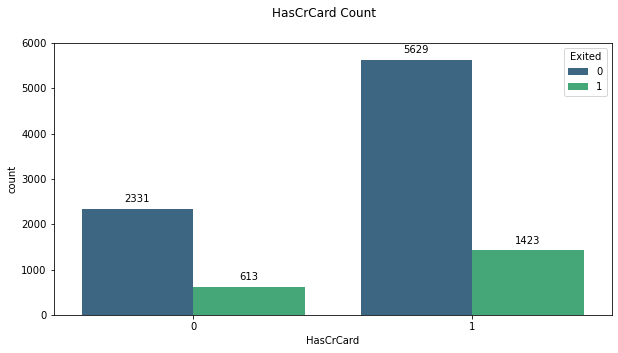

In [43]:
count ('HasCrCard')

In [44]:
# count number of customers in HasCrCard

hasCrCard_counts = df.HasCrCard.value_counts()
hasCrCard_counts

1    7052
0    2944
Name: HasCrCard, dtype: int64

In [45]:
# count exited customers in HasCrCard

exited_hasCrCard_counts = exited_1.HasCrCard.value_counts()
exited_hasCrCard_counts

1    1423
0     613
Name: HasCrCard, dtype: int64

In [46]:
# Calculate proportion for HasCrCard exited out of all exited customers

proportion_hasCard = exited_hasCrCard_counts[1]/sum(exited_hasCrCard_counts)*100
proportion_NoCard = exited_hasCrCard_counts[0]/sum(exited_hasCrCard_counts)*100
print("Has Card :" , proportion_hasCard)
print("No Card :" , proportion_NoCard)

Has Card : 69.89194499017681
No Card : 30.108055009823183


In [47]:
# Calculate proportion for individual HasCrCard exited out of its own group

proportion_hasCardGroup = exited_hasCrCard_counts[1]/hasCrCard_counts[1]*100
proportion_NoCardGroup = exited_hasCrCard_counts[0]/hasCrCard_counts[0]*100
print("Has Card :" , proportion_hasCardGroup)
print("No Card :" , proportion_NoCardGroup)

Has Card : 20.178672716959728
No Card : 20.822010869565215


👀 As observed, customers who have a credit card (69.89%) tend to leave the bank as compared to those who don't have it. Based on the grouping's proportion analysis, it shows the other way round, those customers who don't have a credit card with the bank (20.82%) tend to leave the bank instead of those who have a credit card with the bank (20.17%).

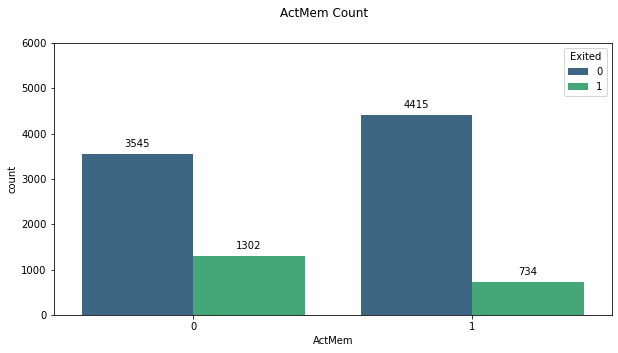

In [48]:
count('ActMem')

In [49]:
# count number of customers in ActMem

ActMem_counts = df.ActMem.value_counts()
ActMem_counts

1    5149
0    4847
Name: ActMem, dtype: int64

In [50]:
# count exited customers in ActMem

exited_ActMem_counts = exited_1.ActMem.value_counts()
exited_ActMem_counts

0    1302
1     734
Name: ActMem, dtype: int64

In [51]:
# Calculate proportion for ActMem exited out of all exited customers

proportion_ActMem = exited_ActMem_counts[1]/sum(exited_ActMem_counts)*100
proportion_NonActMem = exited_ActMem_counts[0]/sum(exited_ActMem_counts)*100
print("Active Member :" , proportion_ActMem)
print("Non Active Member :" , proportion_NonActMem)

Active Member : 36.05108055009823
Non Active Member : 63.948919449901766


In [52]:
# Calculate proportion for individual ActMem exited out of its own group

proportion_ActMemGroup = exited_ActMem_counts[1]/ActMem_counts[1]*100
proportion_NonActMemGroup = exited_ActMem_counts[0]/ActMem_counts[0]*100
print("Active Member :" , proportion_ActMemGroup)
print("Non Active Member :" , proportion_NonActMemGroup)

Active Member : 14.255195183530784
Non Active Member : 26.861976480297088


👀 As observed, customers who are non-active members (63.95%) tend to leave the bank as compared to those who remained active.  Similar results show in the grouping's proportion analysis as well.

## Data preparation**

**Transform data into dummy encoded dataframe**

In [53]:
df = pd.get_dummies(df, drop_first=True)
df.head()

CustomerId  CredRate   Age  Tenure    Balance  Prod_Number  HasCrCard  \
0    15634602       619  42.0       2       0.00            1          1   
1    15647311       608  41.0       1   83807.86            1          0   
2    15619304       502  42.0       8  159660.80            3          1   
3    15701354       699  39.0       1       0.00            2          0   
4    15737888       850  43.0       2  125510.82            1          1   

   ActMem  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  \
0       1        101348.88       1                  0                0   
1       1        112542.58       0                  0                1   
2       0        113931.57       1                  0                0   
3       0         93826.63       0                  0                0   
4       1         79084.10       0                  0                1   

   Gender_Male  
0            0  
1            0  
2            0  
3            0  
4            0

**Split the data into train and test set**

In [54]:
# drop CustomerID in variable X as it is an uninformative feature
# drop Exited in variable X as it's a target column (y)
# use stratify due to imbalance data distributed in target column
# split the train and test sets to 70-30 ratio

X = df.drop(['CustomerId','Exited'] , axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=789)

**Scale the features**

In [55]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Modeling**

In machine learning, classification is a supervised learning concept which basically categorizes a set of data into classes.  In this project, our goal is to predict the probability of a customer is likely to churn or not to churn, therefore, we will use classification algorithms for this binary classification scenario.

**Use K-fold cross validator to examine which best classifier algorithms to apply**

Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

In [56]:
scores = []
titles = []

classifier = [('LR', LogisticRegression()),
              ('KNN', KNeighborsClassifier()),
              ('DT', DecisionTreeClassifier()),
              ('RF', RandomForestClassifier()),
              ('SVM', SVC()),
              ('GB', GradientBoostingClassifier()),
              ("ADA", AdaBoostClassifier()),
              ("XGB", xgb.XGBClassifier())]
 
for title, model in classifier:
    kfold = KFold(n_splits=10)
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    scores.append(cv_scores)
    titles.append(title)
    score = "%s: %f" % (title, cv_scores.mean())
    print(score)

LR: 0.789818
KNN: 0.765008
DT: 0.790717
RF: 0.861447
SVM: 0.796321
GB: 0.864646
ADA: 0.857144
XGB: 0.856244


👀 The best scores are Gradient Boosting Classifier (GB) and RandomForest Classifier (RF). Therefore, will develop both models (GB and RF) to test which model is better to use in this scenario.  Select one model after the testing eventually.

### Model 1) Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

**Run a Gradient Boosting Classifier base model with the train set and evaluate on the test set by printing classification_report and roc_auc_score.**

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2388
           1       0.76      0.45      0.57       611

    accuracy                           0.86      2999
   macro avg       0.82      0.71      0.74      2999
weighted avg       0.85      0.86      0.85      2999



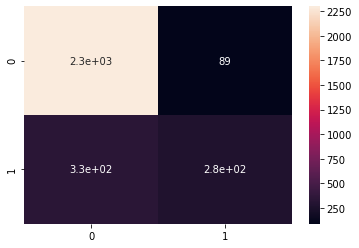

In [57]:
base_model_GB = GradientBoostingClassifier(random_state = 789)

base_model_GB.fit(X_train, y_train)

y_pred = base_model_GB.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)
print(classification_report(y_test, y_pred))

In [58]:
print ('AUC score :', roc_auc_score(y_test, y_pred))

AUC score : 0.7088610674759505


**Use Sequential Feature Selector to choose the 'best' features for the above GB base model, based on the recall scoring.**

Sequential Feature Selection algorithms is to automatically select a subset of features that is most relevant to the problem.

In [59]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [60]:
# use forward selection 
# use recall as scoring 

sfs_GB = SFS(base_model_GB, 
          k_features='best', 
          forward=True, 
          scoring='recall',
          cv=5)

In [61]:
sfs_GB = sfs_GB.fit(X_train, y_train)

In [62]:
pd.DataFrame.from_dict(sfs_GB.get_metric_dict()).T

feature_idx  \
1                                 (1,)   
2                               (1, 4)   
3                            (0, 1, 4)   
4                         (0, 1, 4, 9)   
5                      (0, 1, 4, 5, 9)   
6                   (0, 1, 3, 4, 5, 9)   
7                (0, 1, 3, 4, 5, 8, 9)   
8             (0, 1, 3, 4, 5, 6, 8, 9)   
9         (0, 1, 3, 4, 5, 6, 8, 9, 10)   
10     (0, 1, 2, 3, 4, 5, 6, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [0.2807017543859649, 0.23157894736842105, 0.17...  0.215439   
2   [0.45964912280701753, 0.40350877192982454, 0.4...  0.436491   
3   [0.45964912280701753, 0.45263157894736844, 0.4...  0.447719   
4   [0.4631578947368421, 0.45964912280701753, 0.43...  0.447018   
5   [0.4666666666666667, 0.45614035087719296, 0.43...  0.445614   
6   [0.4807017543859649, 0.44912280701754387, 0.42...  0.447018   
7   [0.4631578947368421, 0.4666666666666667, 0.396...  0.449825   
8   [0.4807017543859649, 0.49473684210526314, 0.44...  0.472281   
9   [0.5052631578947369, 0.4842105263157895, 0.435...  0.477895   
10  [0.5052631578947369, 0.4842105263157895, 0.438...  0.475088   
11  [0.5052631578947369, 0.4982456140350877, 0.428...  0.467368   

                                        feature_names   ci_bound    std_dev  \
1                                              (Age,)  0.0492869  0.0383469   
2                                  (Age, Prod_Number)  0.0243027  0.0189083   
3                        (CredRate, Age, Prod_Number)  0.0138561  0.0107806   
4       (CredRate, Age, Prod_Number, Geography_Spain)  0.0162853  0.0126705   
5   (CredRate, Age, Prod_Number, HasCrCard, Geogra...  0.0180392  0.0140351   
6   (CredRate, Age, Balance, Prod_Number, HasCrCar...  0.0383306  0.0298225   
7   (CredRate, Age, Balance, Prod_Number, HasCrCar...  0.0404777  0.0314931   
8   (CredRate, Age, Balance, Prod_Number, HasCrCar...  0.0208818  0.0162468   
9   (CredRate, Age, Balance, Prod_Number, HasCrCar...  0.0296962  0.0231047   
10  (CredRate, Age, Tenure, Balance, Prod_Number, ...  0.0277416  0.0215839   
11  (CredRate, Age, Tenure, Balance, Prod_Number, ...  0.0416662  0.0324177   

       std_err  
1    0.0191734  
2   0.00945417  
3   0.00539028  
4   0.00633525  
5   0.00701754  
6    0.0149112  
7    0.0157465  
8   0.00812339  
9    0.0115523  
10    0.010792  
11   0.0162089

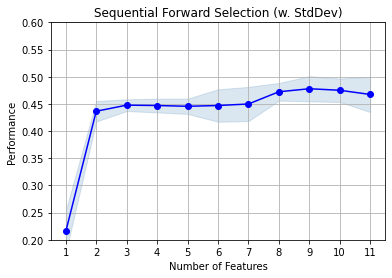

In [63]:
# Plot graph showing the selection results 

fig1 = plot_sfs(sfs_GB.get_metric_dict(), kind='std_dev')

plt.ylim([0.2,0.6])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [64]:
print('\n Selected Feature index:', sfs_GB.k_feature_idx_)
print('\n Selected Feature names:', sfs_GB.k_feature_names_)
print('\n CV Score:', sfs_GB.k_score_)


 Selected Feature index: (0, 1, 3, 4, 5, 6, 8, 9, 10)

 Selected Feature names: ('CredRate', 'Age', 'Balance', 'Prod_Number', 'HasCrCard', 'ActMem', 'Geography_Germany', 'Geography_Spain', 'Gender_Male')

 CV Score: 0.47789473684210526


👀 From the Sequential Feature Selector above, observed that with 9 features the model will perform better, hence, will drop Tenure and Estimated Salary columns.

**Fit new features selected by the Sequential Feature Selector to GB model and use Grid search to find optimal parameters.**

In [67]:
# remove features selected for train and test set from Sequential Feature Selector above

X_train_GB = X_train.drop(['Tenure','EstimatedSalary'], axis=1)
X_test_GB = X_test.drop(['Tenure','EstimatedSalary'], axis=1)

In [65]:
param_dict_GB = {'n_estimators' : [10, 50, 100], 
                 'max_depth' : [5, 7, 10],
                 'learning_rate' : [0.01, 0.05, 0.1]} 

In [66]:
grid_model_GB = GridSearchCV(param_grid= param_dict_GB , 
                             estimator= base_model_GB, 
                             cv= 5 , verbose=1)

In [67]:
grid_model_GB.fit(X_train_GB, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=789),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [68]:
grid_model_GB.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

**Building the Gradient Boosting model by the best param from Grid Search and new features selected by the Sequential Feature Selector.**

In [69]:
model_GB = GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.05, 
                                      max_depth= 5, random_state=789)

In [70]:
model_GB.fit(X_train_GB, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=789)

In [71]:
y_pred_GB = model_GB.predict(X_test_GB)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2388
           1       0.76      0.47      0.58       611

    accuracy                           0.86      2999
   macro avg       0.82      0.72      0.75      2999
weighted avg       0.85      0.86      0.85      2999



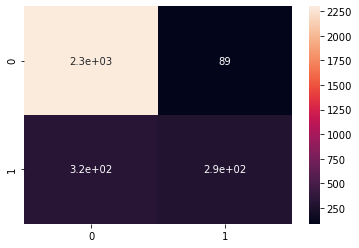

In [72]:
cm = confusion_matrix(y_test, y_pred_GB)
sns.heatmap(cm, annot= True)
print(classification_report(y_test, y_pred_GB))

In [73]:
print ('AUC score :', roc_auc_score(y_test, y_pred_GB))

AUC score : 0.7170443735315968


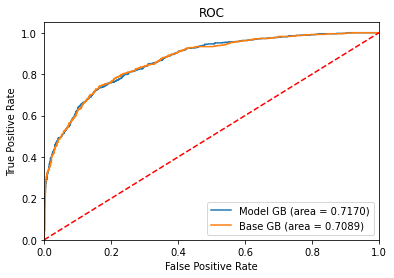

In [74]:
# plot graph to compare gradient boosting's base and best model roc_auc_score

area_under_curve_MGB = roc_auc_score(y_test, y_pred_GB)
area_under_curve_BGB = roc_auc_score(y_test, y_pred)

fpr_MGB, tpr_MGB, thresholds = roc_curve(y_test, model_GB.predict_proba(X_test_GB)[:,1])
fpr_BGB, tpr_BGB, thresholds = roc_curve(y_test, base_model_GB.predict_proba(X_test)[:,1])

plt.plot(fpr_MGB, tpr_MGB, label='Model GB (area = %0.4f)' % area_under_curve_MGB)
plt.plot(fpr_BGB, tpr_BGB, label='Base GB (area = %0.4f)' % area_under_curve_BGB)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

👀 Improvement shown in Gradient Boosting Classification model as below :
-  Recall score improved from 45% to 47%
-  roc_auc_score improved from 70.89% to 71.70%

### Model 2) Random Forest Classifier

**Run a Random Forest Classifier base model with the train set and evaluate on test set.**

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2388
           1       0.76      0.45      0.56       611

    accuracy                           0.86      2999
   macro avg       0.81      0.70      0.74      2999
weighted avg       0.85      0.86      0.84      2999



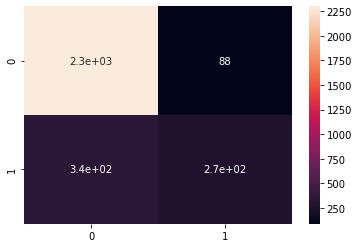

In [75]:
base_model_RF = RandomForestClassifier(random_state = 789)

base_model_RF.fit(X_train, y_train)

y_pred = base_model_RF.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)
print(classification_report(y_test, y_pred))

In [76]:
print ('AUC score :', roc_auc_score(y_test, y_pred))

AUC score : 0.704978794682633


**Use Sequential Feature Selector to choose the 'best' features for the above RF model, based on the recall's scoring**

In [77]:
# use forward selection 

sfs_RF = SFS(base_model_RF, 
          k_features='best', 
          forward=True, 
          scoring='recall',
          cv=5)

In [78]:
sfs_RF = sfs_RF.fit(X_train, y_train)

In [79]:
pd.DataFrame.from_dict(sfs_RF.get_metric_dict()).T

feature_idx  \
1                                 (7,)   
2                               (4, 7)   
3                            (1, 4, 7)   
4                         (1, 4, 6, 7)   
5                      (1, 4, 6, 7, 8)   
6                   (1, 3, 4, 6, 7, 8)   
7                (1, 3, 4, 6, 7, 8, 9)   
8            (1, 3, 4, 6, 7, 8, 9, 10)   
9         (0, 1, 3, 4, 6, 7, 8, 9, 10)   
10     (0, 1, 3, 4, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [0.20701754385964913, 0.23859649122807017, 0.2...   0.22807   
2   [0.32280701754385965, 0.2982456140350877, 0.31...  0.322807   
3   [0.5087719298245614, 0.4421052631578947, 0.435...  0.454737   
4   [0.5298245614035088, 0.41403508771929826, 0.47...  0.461754   
5   [0.5052631578947369, 0.4666666666666667, 0.473...      0.48   
6   [0.512280701754386, 0.5052631578947369, 0.4877...  0.495439   
7   [0.5087719298245614, 0.5263157894736842, 0.484...  0.494737   
8   [0.512280701754386, 0.512280701754386, 0.47719...  0.489825   
9   [0.5052631578947369, 0.49473684210526314, 0.48...  0.484912   
10  [0.5087719298245614, 0.49122807017543857, 0.45...  0.479298   
11  [0.4982456140350877, 0.4982456140350877, 0.456...  0.470877   

                                        feature_names   ci_bound    std_dev  \
1                                  (EstimatedSalary,)  0.0222767  0.0173321   
2                      (Prod_Number, EstimatedSalary)   0.021534  0.0167542   
3                 (Age, Prod_Number, EstimatedSalary)   0.035693  0.0277703   
4         (Age, Prod_Number, ActMem, EstimatedSalary)  0.0494517  0.0384751   
5   (Age, Prod_Number, ActMem, EstimatedSalary, Ge...  0.0221669  0.0172466   
6   (Age, Balance, Prod_Number, ActMem, EstimatedS...  0.0159827  0.0124351   
7   (Age, Balance, Prod_Number, ActMem, EstimatedS...   0.026604  0.0206988   
8   (Age, Balance, Prod_Number, ActMem, EstimatedS...  0.0243027  0.0189083   
9   (CredRate, Age, Balance, Prod_Number, ActMem, ...  0.0169702  0.0132034   
10  (CredRate, Age, Balance, Prod_Number, HasCrCar...  0.0237953  0.0185136   
11  (CredRate, Age, Tenure, Balance, Prod_Number, ...  0.0296962  0.0231047   

       std_err  
1   0.00866603  
2   0.00837708  
3    0.0138852  
4    0.0192375  
5    0.0086233  
6   0.00621756  
7    0.0103494  
8   0.00945417  
9   0.00660171  
10  0.00925678  
11   0.0115523

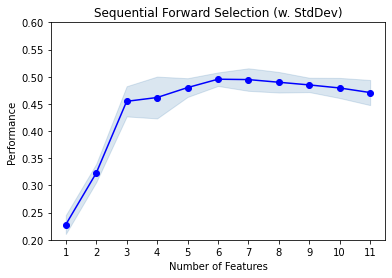

In [80]:
# Plot graph showing the selection results 

fig2 = plot_sfs(sfs_RF.get_metric_dict(), kind='std_dev')

plt.ylim([0.2,0.6])
plt.title('Sequential Forward Selection (w. StdDev)')
#plt.grid()
plt.show()

In [81]:
print('\n Selected Feature index:', sfs_RF.k_feature_idx_ )
print('\n Selected Feature names:', sfs_RF.k_feature_names_)
print('\n CV Score:', sfs_RF.k_score_)


 Selected Feature index: (1, 3, 4, 6, 7, 8)

 Selected Feature names: ('Age', 'Balance', 'Prod_Number', 'ActMem', 'EstimatedSalary', 'Geography_Germany')

 CV Score: 0.495438596491228


👀 From the Sequential Feature Selector above, observed that with 6 features the model will perform better, hence, will drop CredRate, Tenure, HasCrCard, Georgraphy_Spain and Gender_Male's columns.

**Fit new features selected by the Sequential Feature Selector to RF model and use Grid search to find optimal parameters**

In [82]:
# remove features selected for train and test set from Sequential Feature Selector above

X_train_RF = X_train.drop(['CredRate', 'Tenure', 'HasCrCard', 'Geography_Spain', 'Gender_Male'], axis=1)
X_test_RF = X_test.drop(['CredRate', 'Tenure', 'HasCrCard', 'Geography_Spain', 'Gender_Male'], axis=1)

In [83]:
param_dict_RF = {'criterion' : ['gini', 'entropy'],
                 'n_estimators' : [10, 20, 50, 100], 
                 'max_depth' : [5, 6, 7, 9, 10]}

In [84]:
grid_model_RF = GridSearchCV(param_grid= param_dict_RF , 
                             estimator= base_model_RF , cv= 5 , verbose=1)

In [85]:
grid_model_RF.fit(X_train_RF, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   36.8s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=789),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 9, 10],
                         'n_estimators': [10, 20, 50, 100]},
             verbose=1)

In [86]:
grid_model_RF.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}

**Building the Random Forest model based on best param from Grid Search**

In [87]:
best = RandomForestClassifier(criterion='gini', max_depth = 10, n_estimators = 50, random_state = 789)

In [88]:
model_RF = best.fit(X_train_RF, y_train)

In [89]:
y_pred_RF = model_RF.predict(X_test_RF)

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2388
           1       0.76      0.44      0.56       611

    accuracy                           0.86      2999
   macro avg       0.82      0.70      0.74      2999
weighted avg       0.85      0.86      0.84      2999



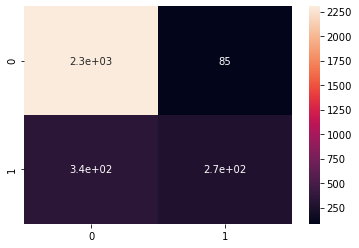

In [90]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot= True)
print(classification_report(y_test, y_pred_RF))

In [91]:
print ('AUC score :', roc_auc_score(y_test, y_pred_RF))

AUC score : 0.7031519435694566


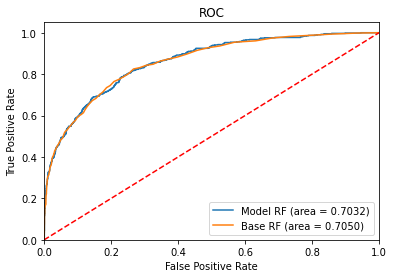

In [92]:
# plot graph to compare random forest's base and best model roc_auc_score

area_under_curve_MRF = roc_auc_score(y_test, y_pred_RF)
area_under_curve_BRF = roc_auc_score(y_test, y_pred)

fpr_MRF, tpr_MRF, thresholds = roc_curve(y_test, model_RF.predict_proba(X_test_RF)[:,1])
fpr_BRF, tpr_BRF, thresholds = roc_curve(y_test, base_model_RF.predict_proba(X_test)[:,1])

plt.plot(fpr_MRF, tpr_MRF, label='Model RF (area = %0.4f)' % area_under_curve_MRF)
plt.plot(fpr_BRF, tpr_BRF, label='Base RF (area = %0.4f)' % area_under_curve_BRF)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

👀  No improvement shown in Random Forest Classification model.

## Conclusion**

**Exploratory Data Analysis**

- 59.08% of exited customers are from ages 37 to 52 years old.
- 73.12% of exited customers are from zero savings (24.5%) and savings range between 97.5K to 147.5K(48.62%).
- 51.86% of exited customers have a credit score between 550 to 700.
- 63.95% of non-active members tend to exit from the bank.
- Female customers tend to have a higher exited rate as compared to male customers.
- Germany has more exited customers followed by Spain then France.
- Customers who have 4 products tend to leave the most, followed by 3, 1, and finally 2 products.
- Customers who don't have a credit card tend to leave the bank.

**MACHINE LEARNING**

The main objective of this project is to predict the probability of whether the customers are likely to churn or not so that the bank can put in necessary action to retain the customers. That is why the recall metrics score on the True positive cases (1 in recall score) are the most important in this scenario. It helps the bank to focus on spending their resources effectively towards the right target instead of wasting effort on the false-negative cases.

Given the results generated by both models, the gradient boosting classifier has derived a better recall score in this case. Besides, the data itself has only 20.37% of churned customer's records while the low CV score (47.79%) over the features of importance also increased the challenge to the model to predict more accurately.  However, the model still managed to capture 47% of True-positive cases.  The model also shows a 71.70% capacity to capture the true-positive rate against the false-positive rate in the roc_auc_score.

Since the CV score did not perform well, I suggest driving in more deeply in the feature engineering portion in the future if more time is allowed and more resources provided.  It will definitely help the model to achieve better performance.

## THANK YOU !!!😊